# Apriori Algorithm / Market Basket Analysis

In [12]:
### installation for wordcloud
#conda install -c conda-forge wordcloud
#conda install -c conda-forge/label/gcc7 wordcloud
#conda install -c conda-forge/label/cf201901 wordcloud
#conda install -c conda-forge/label/cf202003 wordcloud

In [ ]:
#conda install -c conda-forge wordcloud=1.2.1
#python -m pip install wordcloud

In [11]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [13]:
!pip install mlxtend

In [14]:
import pandas as pd

In [15]:
data=pd.read_csv("C:/Users/hp/Downloads/GroceryStoreDataSet.csv",names=['products'])

In [16]:
df=data

In [17]:
data

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [18]:
data.columns

Index(['products'], dtype='object')

In [19]:
data.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COCK'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [20]:
data=list(df['products'].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [21]:
from mlxtend.preprocessing import TransactionEncoder

In [22]:
te=TransactionEncoder()
te_data=te.fit(data).transform(data)
df=pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [23]:
from mlxtend.frequent_patterns import apriori

In [28]:
df1=apriori(df,min_support=0.01,use_colnames=True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(BREAD, TEA, MAGGI, BISCUIT)"
79,0.10,"(COFFEE, COCK, CORNFLAKES, BISCUIT)"
80,0.05,"(BREAD, JAM, MAGGI, MILK)"
81,0.05,"(BREAD, TEA, JAM, MAGGI)"


In [25]:
df1.sort_values(by='support',ascending=False)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
...,...,...
55,0.05,"(MILK, CORNFLAKES, BISCUIT)"
57,0.05,"(BREAD, SUGER, BOURNVITA)"
17,0.05,"(SUGER, BISCUIT)"
37,0.05,"(MAGGI, CORNFLAKES)"


In [29]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
...,...,...,...
78,0.05,"(BREAD, TEA, MAGGI, BISCUIT)",4
79,0.10,"(COFFEE, COCK, CORNFLAKES, BISCUIT)",4
80,0.05,"(BREAD, JAM, MAGGI, MILK)",4
81,0.05,"(BREAD, TEA, JAM, MAGGI)",4


In [31]:
df1[(df1['length']==2) & (df1['support']>=0.05)]

,support,itemsets,length
11,0.20,"(BREAD, BISCUIT)",2
12,0.10,"(COCK, BISCUIT)",2
13,0.10,"(COFFEE, BISCUIT)",2
14,0.15,"(CORNFLAKES, BISCUIT)",2
15,0.10,"(MAGGI, BISCUIT)",2
16,0.10,"(MILK, BISCUIT)",2
17,0.05,"(SUGER, BISCUIT)",2
18,0.10,"(TEA, BISCUIT)",2
19,0.15,"(BREAD, BOURNVITA)",2
20,0.05,"(COFFEE, BOURNVITA)",2


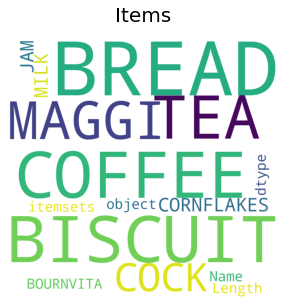

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (12, 5)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df1['itemsets']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()